# Wakefield

In [ ]:
import sys
sys.path.append("..")
import pprint
pp = pprint.PrettyPrinter(indent=4)
from cavsim2d.cavity import Cavity, Cavities

cavs = Cavities()
cavs.save(project_folder='D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest')

# define geometry parameters
n_cells = 2
midcell = [42, 42, 12, 19, 35, 57.7, 103.353]  # <- A, B, a, b, Ri, L, Req
endcell_l = [40.34, 40.34, 10, 13.5, 39, 55.716, 103.353]
endcell_r = [42, 42, 9, 12.8, 39, 56.815, 103.353]

# create cavity
tesla = Cavity(n_cells, midcell, midcell,midcell, beampipe='none')
cavs.add_cavity([tesla], names=['TESLA'], plot_labels=['TESLA'])

wakefield_config = {
    'bunch_length': 25,
    'wakelength': 50,
    'processes': 1,
    'rerun': True
}
cavs.run_wakefield(wakefield_config)
pp.pprint(cavs.wakefield_qois)

Project D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest created successfully/already exists.


In [ ]:
ax = cavs.plot('ZL')
ax = cavs.plot('Zt', ax)
ax.set_yscale('log')

# Wakefield + Operating Points

In [5]:
import sys
sys.path.append("..")
import pprint
pp = pprint.PrettyPrinter(indent=4)
from cavsim2d.cavity import Cavity, Cavities

cavs = Cavities()
cavs.save(project_folder='D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest')

# define geometry parameters
n_cells = 2
midcell = [42, 42, 12, 19, 35, 57.7, 103.353]  # <- A, B, a, b, Ri, L, Req
endcell_l = [40.34, 40.34, 10, 13.5, 39, 55.716, 103.353]
endcell_r = [42, 42, 9, 12.8, 39, 56.815, 103.353]

# create cavity
tesla = Cavity(n_cells, midcell, endcell_l,endcell_r, beampipe='none')
cavs.add_cavity([tesla], names=['TESLA'], plot_labels=['TESLA'])

op_points = {
            "Z": {
                "freq [MHz]": 400.79,  # Operating frequency
                "E [GeV]": 45.6,  # <- Beam energy
                "I0 [mA]": 1280,  # <- Beam current
                "V [GV]": 0.12,  # <- Total voltage
                "Eacc [MV/m]": 5.72,  # <- Accelerating field
                "nu_s []": 0.0370,  # <- Synchrotron oscillation tune
                "alpha_p [1e-5]": 2.85,  # <- Momentum compaction factor
                "tau_z [ms]": 354.91,  # <- Longitudinal damping time
                "tau_xy [ms]": 709.82,  # <- Transverse damping time
                "f_rev [kHz]": 3.07,  # <- Revolution frequency
                "beta_xy [m]": 56,  # <- Beta function
                "N_c []": 56,  # <- Number of cavities
                "T [K]": 4.5,  # <- Operating tempereature
                "sigma_SR [mm]": 4.32,  # <- Bunch length
                "sigma_BS [mm]": 15.2,  # <- Bunch length
                "Nb [1e11]": 2.76  # <- Bunch population
            }
}

wakefield_config = {
    'bunch_length': 25,
    'wakelength': 50,
    'processes': 2,
    'rerun': True,
    'operating_points': op_points,
}
cavs.run_wakefield(wakefield_config)
pp.pprint(cavs.wakefield_qois)

Project D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest created successfully/already exists.
{   'TESLA': {   'Z_BS_15.2mm': {   'I0 [mA]': 1280.0,
                                    'Nb [1e11]': 2.76,
                                    'P_HOM [kW]': 9.566330747727818,
                                    'R/Q [Ohm]': 219.13016190904017,
                                    'k_FM [V/pC]': 0.37696998551035943,
                                    'n cell': 2,
                                    'sigma_z [mm]': 15.2,
                                    '|k_kick| [V/pC/m]': 10.64,
                                    '|k_loss| [V/pC]': 0.546},
                 'Z_SR_4.32mm': {   'I0 [mA]': 1280.0,
                                    'Nb [1e11]': 2.76,
                                    'P_HOM [kW]': 41.464282247350376,
                                    'R/Q [Ohm]': 219.13016190904017,
                                    'k_FM [V/pC]': 0.44135668942484724,
              

{'$k_\\parallel$': <Axes: label='$k_\\parallel$', ylabel='$k_\\parallel$'>,
 '$k_\\perp$': <Axes: label='$k_\\perp$', ylabel='$k_\\perp$'>,
 '$p_\\mathrm{HOM}/cav$': <Axes: label='$p_\\mathrm{HOM}/cav$', ylabel='$p_\\mathrm{HOM}/cav$'>}

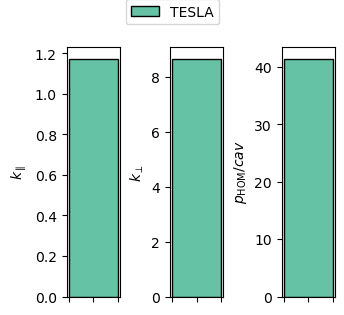

In [6]:
cavs.plot_compare_hom_bar('Z_SR_4.32mm')

# Wakefield + Operating Points + UQ

In [7]:
import sys
sys.path.append("..")
import pprint
pp = pprint.PrettyPrinter(indent=4)
from cavsim2d.cavity import Cavity, Cavities

cavs = Cavities()
cavs.save(project_folder='D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest')

# define geometry parameters
n_cells = 2
midcell = [42, 42, 12, 19, 35, 57.7, 103.353]  # <- A, B, a, b, Ri, L, Req
endcell_l = [40.34, 40.34, 10, 13.5, 39, 55.716, 103.353]
endcell_r = [42, 42, 9, 12.8, 39, 56.815, 103.353]

# create cavity
tesla = Cavity(n_cells, midcell, endcell_l,endcell_r, beampipe='none')
cavs.add_cavity([tesla], names=['TESLA'], plot_labels=['TESLA'])

op_points = {
            "Z": {
                "freq [MHz]": 400.79,  # Operating frequency
                "E [GeV]": 45.6,  # <- Beam energy
                "I0 [mA]": 1280,  # <- Beam current
                "V [GV]": 0.12,  # <- Total voltage
                "Eacc [MV/m]": 5.72,  # <- Accelerating field
                "nu_s []": 0.0370,  # <- Synchrotron oscillation tune
                "alpha_p [1e-5]": 2.85,  # <- Momentum compaction factor
                "tau_z [ms]": 354.91,  # <- Longitudinal damping time
                "tau_xy [ms]": 709.82,  # <- Transverse damping time
                "f_rev [kHz]": 3.07,  # <- Revolution frequency
                "beta_xy [m]": 56,  # <- Beta function
                "N_c []": 56,  # <- Number of cavities
                "T [K]": 4.5,  # <- Operating tempereature
                "sigma_SR [mm]": 4.32,  # <- Bunch length
                "sigma_BS [mm]": 15.2,  # <- Bunch length
                "Nb [1e11]": 2.76  # <- Bunch population
            }
}

wakefield_config = {
    'bunch_length': 25,
    'wakelength': 50,
    'processes': 2,
    'rerun': True,
    'operating_points': op_points,
    'uq_config': {
        'variables': ['A'],
        'objectives': [["ZL", [1, 2, 5]], ["ZT", [2, 3, 4]]],
        'delta': [0.05],
        'processes': 4,
        'distribution': 'gaussian',
        # 'method': ['QMC', 'LHS', 1000],
        # 'method': ['QMC', 'Sobol', 1000],
        # 'method': ['Qudrature', 'Gaussian', 1000],
        'method': ['Quadrature', 'Stroud3'],
        # 'method': ['Quadrature', 'Stroud5'],
        # 'gaussian': ['Quadrature', 'Gaussian'],
        # 'from file': ['<file path>', columns],
        'cell_type': 'mid-cell',
        'cell complexity': 'simplecell'
        }
}
cavs.run_wakefield(wakefield_config)
pp.pprint(cavs.wakefield_qois)

Project D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest created successfully/already exists.
{   'TESLA': {   'Z_BS_15.2mm': {   'I0 [mA]': 1280.0,
                                    'Nb [1e11]': 2.76,
                                    'P_HOM [kW]': 9.566330747727818,
                                    'R/Q [Ohm]': 219.13016190904017,
                                    'k_FM [V/pC]': 0.37696998551035943,
                                    'n cell': 2,
                                    'sigma_z [mm]': 15.2,
                                    '|k_kick| [V/pC/m]': 10.64,
                                    '|k_loss| [V/pC]': 0.546},
                 'Z_SR_4.32mm': {   'I0 [mA]': 1280.0,
                                    'Nb [1e11]': 2.76,
                                    'P_HOM [kW]': 41.464282247350376,
                                    'R/Q [Ohm]': 219.13016190904017,
                                    'k_FM [V/pC]': 0.44135668942484724,
              

{'$k_\\parallel$': <Axes: label='$k_\\parallel$', ylabel='$k_\\parallel$'>,
 '$k_\\perp$': <Axes: label='$k_\\perp$', ylabel='$k_\\perp$'>,
 '$p_\\mathrm{HOM}/cav$': <Axes: label='$p_\\mathrm{HOM}/cav$', ylabel='$p_\\mathrm{HOM}/cav$'>}

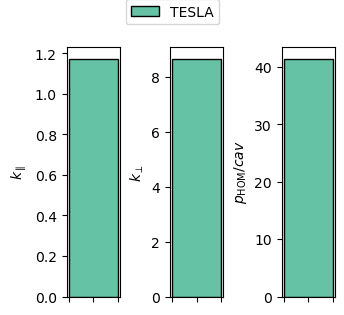

In [8]:
cavs.plot_compare_hom_bar('Z_SR_4.32mm')

# Wakefield (OP) + UQ (+OP)

In [1]:
import sys
sys.path.append("..")
import pprint
pp = pprint.PrettyPrinter(indent=4)
from cavsim2d.cavity import Cavity, Cavities

cavs = Cavities()
cavs.save(project_folder='D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest')

# define geometry parameters
n_cells = 2
midcell = [42, 42, 12, 19, 35, 57.7, 103.353]  # <- A, B, a, b, Ri, L, Req
endcell_l = [40.34, 40.34, 10, 13.5, 39, 55.716, 103.353]
endcell_r = [42, 42, 9, 12.8, 39, 56.815, 103.353]

# create cavity
tesla = Cavity(n_cells, midcell, endcell_l,endcell_r, beampipe='none')
cavs.add_cavity([tesla], names=['TESLA'], plot_labels=['TESLA'])

shape_space = {'reentrant': 
                   {'IC': [53.58, 36.58, 8.08, 9.84, 35, 57.7, 98.27],
                    'OC': [53.58, 36.58, 8.08, 9.84, 35, 57.7, 98.27],
                    'OC_R': [53.58, 36.58, 8.08, 9.84, 35, 57.7, 98.27]
                    }
               }

# create cavity
shape = shape_space['reentrant']
reentrant = Cavity(n_cells, shape['IC'], shape['OC'], shape['OC_R'], beampipe='both')
cavs.add_cavity([reentrant], names=['Reentrant'], plot_labels=['Re-entrant'])

op_points = {
            "Z": {
                "freq [MHz]": 400.79,  # Operating frequency
                "E [GeV]": 45.6,  # <- Beam energy
                "I0 [mA]": 1280,  # <- Beam current
                "V [GV]": 0.12,  # <- Total voltage
                "Eacc [MV/m]": 5.72,  # <- Accelerating field
                "nu_s []": 0.0370,  # <- Synchrotron oscillation tune
                "alpha_p [1e-5]": 2.85,  # <- Momentum compaction factor
                "tau_z [ms]": 354.91,  # <- Longitudinal damping time
                "tau_xy [ms]": 709.82,  # <- Transverse damping time
                "f_rev [kHz]": 3.07,  # <- Revolution frequency
                "beta_xy [m]": 56,  # <- Beta function
                "N_c []": 56,  # <- Number of cavities
                "T [K]": 4.5,  # <- Operating tempereature
                "sigma_SR [mm]": 4.32,  # <- Bunch length
                "sigma_BS [mm]": 15.2,  # <- Bunch length
                "Nb [1e11]": 2.76  # <- Bunch population
            }
}

wakefield_config = {
    'bunch_length': 25,
    'wakelength': 50,
    'processes': 2,
    'rerun': False,
    'operating_points': op_points,
    'uq_config': {
        'variables': ['A', 'B'],
        'objectives': [["ZL", [1, 2, 5]], ["ZT", [2, 3, 4]], 'k_FM [V/pC]', '|k_loss| [V/pC]', '|k_kick| [V/pC/m]', 'P_HOM [kW]'],
        'delta': [0.05, 0.05],
        'processes': 4,
        'method': ['Stroud3'],
        'cell_type': 'mid-cell',
        'cell complexity': 'simplecell',
        'operating_points': op_points
        }
}
cavs.run_wakefield(wakefield_config)
pp.pprint(cavs.wakefield_qois)

Project D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest created successfully/already exists.
{   'Reentrant': {   'Z_BS_15.2mm': {   'I0 [mA]': 1280.0,
                                        'Nb [1e11]': 2.76,
                                        'P_HOM [kW]': 28.191633762157007,
                                        'R/Q [Ohm]': 120.10912471369596,
                                        'k_FM [V/pC]': 0.18897460699747692,
                                        'n cell': 2,
                                        'sigma_z [mm]': 15.2,
                                        '|k_kick| [V/pC/m]': 13.82,
                                        '|k_loss| [V/pC]': 0.6871},
                     'Z_SR_4.32mm': {   'I0 [mA]': 1280.0,
                                        'Nb [1e11]': 2.76,
                                        'P_HOM [kW]': 61.71688813943832,
                                        'R/Q [Ohm]': 120.10912471369596,
                                 

In [2]:
pp.pprint(cavs.uq_hom_results)

{   'Reentrant': {   'P_HOM [kW]': {   'expe': [28.287161933760206],
                                       'stdDev': [0.3703989092717517]},
                     'ZL [max(1<f<2)]': {   'expe': [0.20312943894482294],
                                            'stdDev': [0.0005164981825898615]},
                     'ZL [max(2<f<5)]': {   'expe': [1.3025],
                                            'stdDev': [0.0005000000000349445]},
                     'ZT [max(2<f<3)]': {'expe': [10.75], 'stdDev': [0.0]},
                     'ZT [max(3<f<4)]': {   'expe': [62.219378215893585],
                                            'stdDev': [0.0009337219173279961]},
                     'k_FM [V/pC]': {   'expe': [0.18098669460388822],
                                        'stdDev': [0.0002446757646352931]},
                     '|k_kick| [V/pC/m]': {   'expe': [13.735],
                                              'stdDev': [0.08500000000019875]},
                     '|k_loss| [V/pC]': {

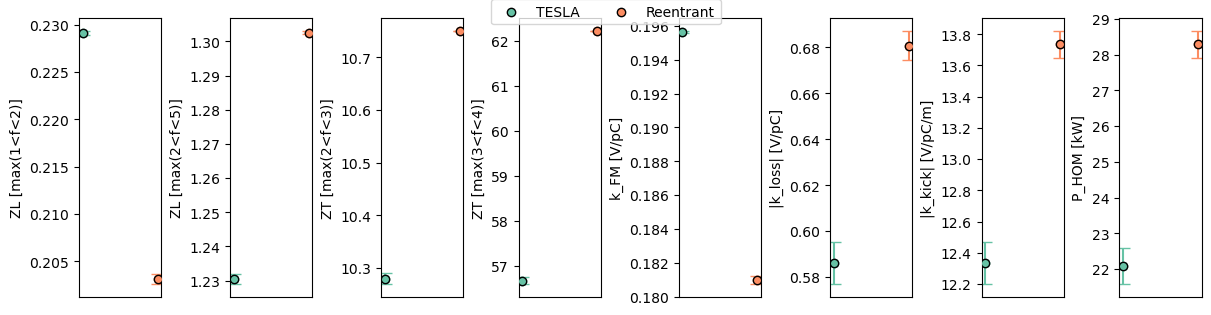

In [3]:
ax = cavs.plot_compare_wakefield('Z_SR_4.32mm', kind='scatter', uq=True)